In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import vectorbt as vbt
import ta

In [51]:
# BTC=pd.read_csv('BTCUSDT.csv')
# BTC=BTC.set_index("Date")
BTC=pd.read_csv('BTCUSDT.csv')
# BTC['Day']=(BTC.Date.str[:10])
# BTC=BTC.drop_duplicates(subset='Day')
# BTC['Day_of_month']=(BTC.Day.str[-2:])
# BTC.Day_of_month=BTC.Day_of_month.astype(int)
# BTC['Payroll']=np.where((BTC['Day_of_month']>23) | (BTC['Day_of_month']<5),1,0)
try:
    BTC=BTC.set_index("Date")
except:
    pass
BTC

,Close
Date,
2021-01-01 00:00,28961.66
2021-01-01 00:01,29009.91
2021-01-01 00:02,28989.30
2021-01-01 00:03,28982.69
2021-01-01 00:04,28975.65
...,...
2024-05-12 12:17:00,61108.55
2024-05-12 12:18:00,61117.63
2024-05-12 12:19:00,61116.61


In [52]:
def historicalVaR(returns, alpha=5,days=1):
    return np.percentile(returns, alpha)*np.sqrt(days)

In [56]:
def Technical_indicators(Merged,target,freq='1M'):

    Merged['Returns']=np.log(Merged.Close/Merged.Close.shift(1))
    

    if freq=='1M':
        window_4_hr=60*4
        window_30_M=30
        window_1_day=60*24
        window_2_day=60*24*2
        window_2_weeks=60*24*14
        windows_50_day=60*24*50
        windows_200_day=60*24*200
        window_20_day=20*60*24
        Merged['ema 4HR'] = Merged[target].ewm(span=window_4_hr, adjust=False).mean()
        Merged['SMA_12HR'] = ta.trend.sma_indicator(Merged[target], window=60*12)

    elif freq=='1D':
        window_20_day=20
        # window_2_day=2
        window_2_weeks=14
        windows_50_day=50
        windows_200_day=200
    
    Merged['ema_4D'] = Merged[target].ewm(span=window_20_day, adjust=False).mean()
    Merged['ema_2W'] = Merged[target].ewm(span=windows_200_day, adjust=False).mean()
    Merged['SMA_50'] = ta.trend.sma_indicator(Merged[target], window=windows_50_day)
    Merged['SMA_200'] = ta.trend.sma_indicator(Merged[target], window=windows_200_day)
    Merged['RSI_14D'] = ta.momentum.RSIIndicator(Merged['Close'], window=window_2_weeks).rsi()
    Merged['RSI_40D'] = ta.momentum.RSIIndicator(Merged['Close'], window=40).rsi()
    Merged['bb_upper'] = ta.volatility.BollingerBands(Merged['Close'], window=60).bollinger_hband()
    Merged['bb_lower'] = ta.volatility.BollingerBands(Merged['Close'], window=60).bollinger_lband()
    Merged=Merged.dropna()
    # print(Merged)
    Merged['VaR']=-historicalVaR(Merged['Returns'],5)*Merged['Close']
    Merged['Position_size']=10**3/Merged['VaR']
    return Merged

In [57]:
Merged=Technical_indicators(BTC,'Close',freq='1M')
Merged[200:]

C:\Users\adnan\AppData\Local\Temp\ipykernel_11564\3378169862.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adnan\AppData\Local\Temp\ipykernel_11564\3378169862.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Returns,ema 4HR,SMA_12HR,ema_4D,ema_2W,SMA_50,SMA_200,RSI_14D,RSI_40D,bb_upper,bb_lower,VaR,Position_size
Date,,,,,,,,,,,,,,
2021-07-20 13:22,29669.31,-1.002217e-03,29688.457325,29807.995194,32858.329156,40714.628494,34718.885300,44573.408474,49.584025,47.469083,29769.933529,29626.205137,32.850290,30.441131
2021-07-20 13:23,29613.83,-1.871696e-03,29687.838011,29806.540986,32858.103851,40714.551406,34718.782179,44573.409802,49.578040,43.348315,29771.808518,29622.581148,32.788862,30.498161
2021-07-20 13:24,29559.33,-1.842052e-03,29686.771554,29805.059278,32857.874778,40714.473939,34718.678558,44573.410875,49.572162,39.861888,29777.636224,29613.085776,32.728519,30.554392
2021-07-20 13:25,29568.39,3.064552e-04,29685.789135,29803.613986,32857.646349,40714.396536,34718.575914,44573.412067,49.573156,40.675411,29781.927274,29605.372393,32.738550,30.545030
2021-07-20 13:26,29634.12,2.220515e-03,29685.360345,29802.342222,32857.422501,40714.319590,34718.474172,44573.413563,49.580366,46.100831,29782.337407,29604.292926,32.811328,30.477279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12 12:17:00,61108.55,-6.610637e-04,61096.881776,60996.972028,62737.063898,52885.321164,65498.771525,50899.308867,49.833485,46.976300,61202.907086,61096.933247,67.660273,14.779722
2024-05-12 12:18:00,61117.63,1.485770e-04,61097.053960,60997.190944,62736.951441,52885.378333,65498.722687,50899.401810,49.834201,47.792054,61201.912947,61095.848053,67.670327,14.777526
2024-05-12 12:19:00,61116.61,-1.668927e-05,61097.216251,60997.401875,62736.838921,52885.435494,65498.674269,50899.494666,49.834121,47.707490,61200.651665,61094.879335,67.669197,14.777772


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


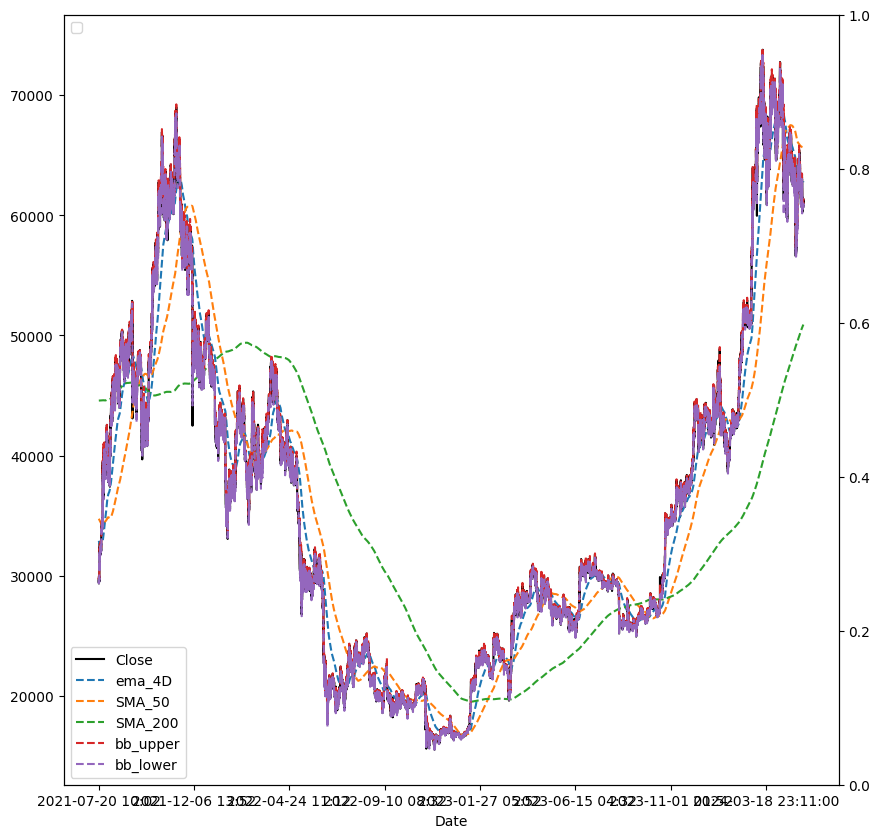

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
Merged['Close'].plot(ax=ax,color='black')
Merged['ema_4D'].plot(ax=ax, style='--')
Merged['SMA_50'].plot(ax=ax, style='--')
Merged['SMA_200'].plot(ax=ax, style='--')
Merged['bb_upper'].plot(ax=ax, style='--')
Merged['bb_lower'].plot(ax=ax, style='--')

ax.legend()
ax2 = ax.twinx()
# Merged['RSI_14D'].plot(ax=ax2, color='orange', label='RSI 14D')
# Merged['RSI_40D'].plot(ax=ax2, color='navy', label='RSI 40D')
# Merged['VaR'].plot(ax=ax2, color='orange', label='VAR')
# Merged['Signal'].plot(ax=ax2, color='orange', label='Signal')

# ax2.axhline(55)
ax2.legend(loc='upper left')
plt.show()




In [59]:
'''
ema1>Close sell
ema1<Close buy
SMA50>SMA200 Buy

'''

'\nema1>Close sell\nema1<Close buy\nSMA50>SMA200 Buy\n\n'

In [60]:
Merged['Signal']=np.where((Merged['ema_4D']>Merged['SMA_50']) & (Merged['Close']>Merged['SMA_200']),1,
                np.where((Merged['ema_4D']<Merged['SMA_50']),-1,0))

Merged['Signal'].unique()


Merged['Signal'].iloc[0:10]=0

C:\Users\adnan\AppData\Local\Temp\ipykernel_11564\2681679334.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adnan\AppData\Local\Temp\ipykernel_11564\2681679334.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
buy_signals = Merged['Signal']==1
sell_signal=Merged['Signal']==-1

# buy_exit=Merged['Signal']!=1
# sell_signal_exit=Merged['Signal']!=-1

# Create the portfolio
pf = vbt.Portfolio.from_signals(Merged['Close'],
                                max_size=Merged['Position_size'],
                                allow_partial=True,
                                # size=Merged['Position_size'],
                                       entries=buy_signals,
                                       exits=sell_signal,
                                   #     tp_stop=0.2,
                                   #     sl_stop=0.1,
                                   #     sl_trail=True,
                                       short_entries=sell_signal,
                                       short_exits=buy_signals,
                                       fees=0.005,init_cash=10000)
# Analyze the results
portfolio_perf = pf.stats()
# print(np.round(portfolio_perf,2))
print((portfolio_perf))

c:\Users\adnan\AppData\Local\Programs\Python\Python39\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

c:\Users\adnan\AppData\Local\Programs\Python\Python39\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

c:\Users\adnan\AppData\Local\Programs\Python\Python39\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

c:\Users\adnan\AppData\Local\Programs\Python\Python39\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                            2021-07-20 10:02
End                           2024-05-12 12:21:00
Period                                    1478551
Start Value                               10000.0
End Value                             7478.060061
Total Return [%]                       -25.219399
Benchmark Return [%]                   107.192521
Max Gross Exposure [%]                      100.0
Total Fees Paid                        784.604651
Max Drawdown [%]                        70.541041
Max Drawdown Duration                   1478541.0
Total Trades                                   15
Total Closed Trades                            14
Total Open Trades                               1
Open Trade PnL                         226.180479
Win Rate [%]                                 50.0
Best Trade [%]                          64.663667
Worst Trade [%]                        -53.729547
Avg Winning Trade [%]                   23.920795
Avg Losing Trade [%]                   -19.690907


In [63]:
pf.plot().show()

KeyboardInterrupt: 